In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import math
def pearson(vector1, vector2):
    n = len(vector1)
    #simple sums
    sum1 = sum(float(vector1[i]) for i in range(n))
    sum2 = sum(float(vector2[i]) for i in range(n))
    #sum up the squares
    sum1_pow = sum([pow(v, 2.0) for v in vector1])
    sum2_pow = sum([pow(v, 2.0) for v in vector2])
    #sum up the products
    p_sum = sum([vector1[i]*vector2[i] for i in range(n)])
    #分子num，分母den
    num = p_sum - (sum1*sum2/n)
    den = math.sqrt((sum1_pow-pow(sum1, 2)/n)*(sum2_pow-pow(sum2, 2)/n))
    if den == 0:
        return 0.0
    return num/den
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score#R square
def calculation(y_predict,y_test):
    #mse=mean_squared_error(y_test,y_predict)
    #mae=mean_absolute_error(y_test,y_predict)
    r2=r2_score(y_test,y_predict)
    #pccs=pearson(y_test,y_predict)
    #print('mse',mse,'mae',mae,'r2',r2,'r',pccs)
    print('r2',r2)
    return r2

In [20]:
import matplotlib.pyplot as plt


In [45]:
test=pd.read_csv('test_finger.csv').iloc[:,1:]
train=pd.read_csv('train_finger_name.csv').iloc[:,1:]
#data3=pd.read_excel('hob_data_set.xlsx',sheet_name='Test set 2') 

In [57]:
train=train.replace(np.NaN, 0)
test=test.replace(np.NaN, 0)
x_test=np.array(test)
x_train=np.array(train)

In [60]:
test

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,73.222407,55.918156,0,3,119.027589,2.484476,4.964968,119.027589,1.239871,5.463272,...,11.391808,153.940560,1414.518432,7.858436,62651,159,488.0,570.0,39.111111,21.305556
1,19.246361,15.961234,0,0,32.589361,2.475468,4.950937,32.589361,1.303574,4.144021,...,10.196717,59.921539,352.134241,7.655092,1410,43,130.0,155.0,8.750000,5.611111
2,21.027286,18.465823,0,1,34.361854,2.467430,4.934859,34.361854,1.227209,4.228365,...,10.193878,63.094999,407.233955,6.568290,1949,45,138.0,160.0,11.090278,6.333333
3,17.552118,15.944064,0,3,27.700033,2.474275,4.934782,27.700033,1.204349,4.047581,...,10.060021,70.484053,320.094311,8.423535,1153,35,118.0,137.0,9.840278,5.027778
4,13.807986,12.716102,1,0,22.785133,2.409629,4.819258,22.785133,1.199218,3.826585,...,9.757247,51.955014,285.103479,7.502723,728,29,90.0,103.0,8.506944,4.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,21.787059,17.061554,0,1,37.663781,2.525481,5.050961,37.663781,1.298751,4.279391,...,10.309386,64.462839,413.177313,7.378166,2274,49,146.0,173.0,9.750000,6.833333
262,24.332110,20.403834,3,0,39.998027,2.645787,5.291433,39.998027,1.249938,4.388472,...,10.733545,82.269503,496.064645,9.921293,3113,51,166.0,200.0,12.423611,7.250000
263,10.065904,9.843620,0,1,16.843988,2.396029,4.792057,16.843988,1.203142,3.528175,...,9.492432,45.488824,207.110673,6.680989,288,22,66.0,77.0,6.555556,3.361111
264,17.179861,13.863771,0,0,27.395456,2.609083,5.180348,27.395456,1.304546,4.029965,...,10.533402,70.727122,288.208930,5.881815,802,44,126.0,160.0,7.041667,4.305556


In [61]:
train

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,24.916749,21.330173,3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.680906,70.382546,662.154671,9.459352,3500004456,40,150.0,156.0,0.000000,8.333333
1,16.944803,13.660186,0,1,27.577593,2.628402,5.093440,27.577593,1.313219,4.021546,...,10.368761,70.880960,287.152144,6.836956,766,44,122.0,153.0,6.340278,4.500000
2,23.434942,18.951645,0,0,36.526304,2.543268,4.979309,36.526304,1.217543,4.325897,...,10.440419,80.323551,416.329045,5.626068,2688,49,160.0,188.0,12.013889,6.347222
3,21.136972,16.996168,0,1,35.775182,2.598451,5.087521,35.775182,1.325007,4.241037,...,10.420822,77.262212,363.145167,7.894460,1672,49,146.0,179.0,8.361111,6.027778
4,16.280035,14.176323,0,1,27.584895,2.443323,4.860804,27.584895,1.313566,3.981092,...,9.976599,68.561247,321.059027,8.677271,867,33,110.0,131.0,6.527778,4.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,33.310425,24.004339,1,3,53.357565,2.636274,5.232660,53.357565,1.240874,4.681612,...,10.883748,95.225181,627.464493,5.809856,7704,75,228.0,271.0,16.298611,9.347222
1061,12.118275,10.624530,0,0,20.388826,2.390361,4.780722,20.388826,1.274302,3.691943,...,9.618801,48.335122,211.074562,8.442982,425,24,80.0,93.0,5.555556,3.666667
1062,21.517512,17.462176,2,1,35.745023,2.447673,4.855946,35.745023,1.276608,4.246447,...,10.129068,71.062891,389.195071,7.076274,2077,47,142.0,165.0,9.500000,6.250000
1063,14.527174,12.678904,0,1,23.527792,2.430456,4.860911,23.527792,1.238305,3.858594,...,9.841665,52.309217,263.188529,5.981557,672,28,96.0,110.0,7.006944,4.194444


In [58]:
x_test.shape

(266, 1826)

In [59]:
x_train.shape

(1065, 1826)

In [50]:
t_train=pd.read_csv('../t_2_train.csv')
train_labels=list(t_train.iloc[:,-2])
t_test=pd.read_csv('../t_2_test.csv')
test_labels=list(t_test.iloc[:,-2])

In [51]:
test_label=np.log(test_labels)
train_label=np.log(train_labels)

In [52]:
print(max(test_label))
print(min(test_label))

6.709304340258298
-2.7806208939370456


In [53]:
print(max(train_label))
print(min(train_label))

7.203405521083095
-3.912023005428146


In [54]:
num_samples=int(x_train.shape[0]/5)
num_samples

213

In [68]:
#for i in range(50):
rf=RandomForestRegressor(n_estimators=100)#n_estimators=50,max_depth=10
rf.fit(x_train,train_label)
print('-----')
train_pre=rf.predict(x_train)
calculation(train_pre,train_label)

test_pre=rf.predict(x_test)
calculation(test_pre,test_label)

-----
r2 0.9026642053827336
r2 0.2717642445677978


0.2717642445677978

Text(0, 0.5, 'real')

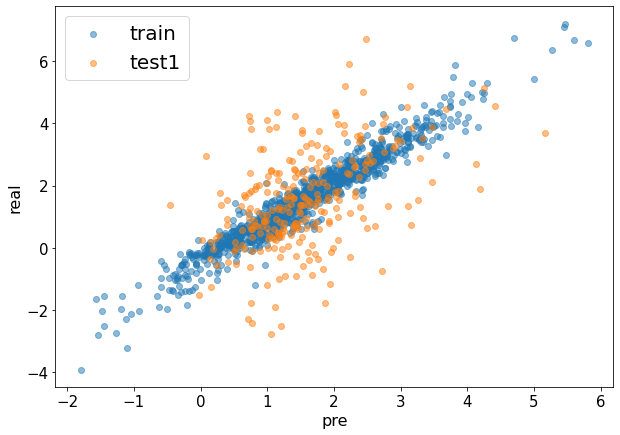

In [67]:
plt.figure(figsize=(10,7))

font2 = {'family' : 'Times New Roman',
'weight' : 'bold',
'size' : 45,
}
plt.scatter(train_pre,train_label,alpha=.5, label='train')
plt.scatter(test_pre,test_label, alpha=.5, label='test1')
#plt.scatter(newX3[:, 0], newX3[:, 1], alpha=.5, label='test2')
plt.legend()
plt.tick_params(labelsize=15)
plt.legend(prop={'family' : 'Times NewRoman', 'size'   : 20})
plt.xlabel('pre',fontsize=16)
plt.ylabel('real',fontsize=16)